<a href="https://colab.research.google.com/github/AmarnadhReddy055/Jigsaw-Multilabel-Toxic-Comment-Classification/blob/main/Multi_Label_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from  matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import hamming_loss
from sklearn import model_selection
from sklearn.metrics import log_loss
from scipy.sparse import csr_matrix
from sklearn.metrics import (confusion_matrix, accuracy_score,precision_score,recall_score,f1_score)

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [4]:
final_data=pd.read_csv('archivo_final.csv')

In [5]:
final_data.head()

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,1,000103f0d9cfb60f,daww match background colour im seemingly stuc...,0,0,0,0,0,0
2,2,000113f07ec002fd,hey man im really trying edit war guy constant...,0,0,0,0,0,0
3,3,0001b41b1c6bb37e,cant make real suggestion improvement wondered...,0,0,0,0,0,0
4,4,0001d958c54c6e35,sir hero chance remember page thats,0,0,0,0,0,0


In [6]:
final_data.shape

(159571, 9)

In [7]:
final_data.dropna(inplace=True)
final_data.drop_duplicates(inplace=True)

In [8]:
final_data.shape

(159506, 9)

# Análisis exploratorio de datos (AED):

Contar el número de comentarios en cada etiqueta

In [9]:
columns=list(final_data.columns[3:])

In [10]:
values=list(final_data.iloc[:,3:].sum().values)

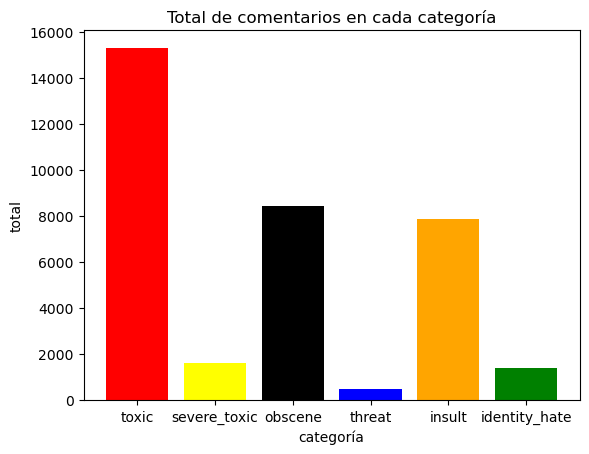

In [11]:
c = ['red', 'yellow', 'black', 'blue', 'orange','green']
plt.bar(columns,values,color=c)
plt.title('Total de comentarios en cada categoría')
plt.xlabel('categoría')
plt.ylabel('total')
plt.savefig('plot.png')
plt.show()

recuento del número de comentarios que pertenecen a varias etiquetas

In [12]:
value=final_data.iloc[:,2:].sum(axis=1)

C:\Users\usuario\AppData\Local\Temp\ipykernel_24088\3964306647.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  value=final_data.iloc[:,2:].sum(axis=1)


In [13]:
labels_count=value.value_counts()

In [14]:
labels_count=labels_count.iloc[1:]

In [15]:
print(labels_count.index)

Int64Index([1, 3, 2, 4, 5, 6], dtype='int64')


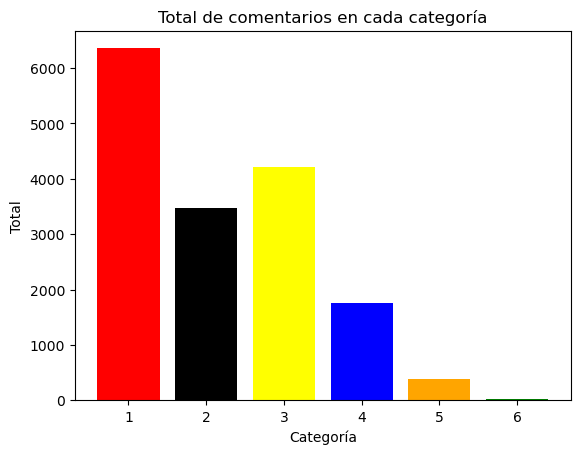

In [16]:
c = ['red', 'yellow', 'black', 'blue', 'orange','green']
plt.bar(labels_count.index,labels_count,color=c)
plt.title('Total de comentarios en cada categoría')
plt.xlabel('Categoría')
plt.ylabel('Total')
plt.show()

# TF-IDF 

In [17]:
from sklearn import model_selection,preprocessing
from sklearn.metrics import accuracy_score

In [18]:
vectorizer=TfidfVectorizer(max_features=10000)
vectors=vectorizer.fit_transform(final_data['comment_text'])

In [19]:
print(vectors.shape)

(159506, 10000)


In [20]:
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(vectors,final_data.iloc[:,3:],test_size=0.2)

# Construcción de modelos

# Model1- Uso del clasificador en cadena Regresión logística

In [21]:
pip install scikit-multilearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from skmultilearn.problem_transform import ClassifierChain
from sklearn.multioutput import ClassifierChain

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
model1=ClassifierChain(LogisticRegression(max_iter=1000))
model1.fit(X_train,Y_train)

ClassifierChain(base_estimator=LogisticRegression(max_iter=1000))

In [25]:
hamming_loss(model1.predict(X_test),Y_test)

0.018990449919545273

In [26]:
log_loss(model1.predict(X_test),Y_test)

0.8034867492214665

In [34]:
print(classification_report(model1.predict(X_test),Y_test,target_names=columns,zero_division=0))

               precision    recall  f1-score   support

        toxic       0.62      0.91      0.74      2122
 severe_toxic       0.21      0.56      0.31       124
      obscene       0.71      0.89      0.79      1397
       threat       0.12      0.73      0.20        15
       insult       0.63      0.75      0.68      1366
identity_hate       0.25      0.72      0.37       101

    micro avg       0.60      0.85      0.71      5125
    macro avg       0.42      0.76      0.52      5125
 weighted avg       0.63      0.85      0.72      5125
  samples avg       0.05      0.06      0.05      5125



In [28]:
from sklearn.metrics import accuracy_score
print("La puntuación del modelo 1 es :  %2.5f " %(accuracy_score(model1.predict(X_test),Y_test)))

La puntuación del modelo 1 es :  0.92022 


# Model2- Regresión logística con relación binaria

In [42]:
from skmultilearn.problem_transform import BinaryRelevance

In [43]:
model2=BinaryRelevance(LogisticRegression(max_iter=1000))
model2.fit(X_train,Y_train)

BinaryRelevance(classifier=LogisticRegression(max_iter=1000),
                require_dense=[True, True])

In [44]:
hamming_loss(model2.predict(X_test),Y_test)

0.019314358556412347

In [45]:
log_loss(model2.predict(X_test),Y_test)

0.6119830224183593

In [46]:
print(classification_report(model2.predict(X_test),Y_test,target_names=columns,zero_division=0))

               precision    recall  f1-score   support

        toxic       0.62      0.91      0.74      2122
 severe_toxic       0.26      0.52      0.35       164
      obscene       0.65      0.92      0.76      1235
       threat       0.12      0.73      0.20        15
       insult       0.53      0.83      0.65      1040
identity_hate       0.23      0.74      0.35        91

    micro avg       0.57      0.88      0.69      4667
    macro avg       0.40      0.77      0.51      4667
 weighted avg       0.58      0.88      0.70      4667
  samples avg       0.05      0.06      0.05      4667



In [47]:
from sklearn.metrics import accuracy_score
print("La puntuación del modelo 2 es :  %2.5f " %(accuracy_score(model2.predict(X_test),Y_test)))

La puntuación del modelo 2 es :  0.91816 


# Model3-Método de clasificación en cadena mediante NaiveBayes

In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier

In [49]:
model3=ClassifierChain(MultinomialNB())
model3.fit(X_train,Y_train)

ClassifierChain(base_estimator=MultinomialNB())

In [50]:
hamming_loss(model3.predict(X_test),Y_test)

0.02559400664535139

In [51]:
log_loss(model3.predict(X_test),Y_test)

1.9422150167568053

In [52]:
print(classification_report(model3.predict(X_test),Y_test,target_names=columns,zero_division=0))

               precision    recall  f1-score   support

        toxic       0.51      0.93      0.66      1720
 severe_toxic       0.29      0.51      0.37       185
      obscene       0.71      0.75      0.73      1658
       threat       0.00      0.00      0.00         4
       insult       0.69      0.68      0.69      1660
identity_hate       0.55      0.18      0.27       886

    micro avg       0.58      0.69      0.63      6113
    macro avg       0.46      0.51      0.45      6113
 weighted avg       0.61      0.69      0.62      6113
  samples avg       0.05      0.04      0.04      6113



In [53]:
from sklearn.metrics import accuracy_score
print("La puntuación del modelo 3 es :  %2.5f " %(accuracy_score(model3.predict(X_test),Y_test)))

La puntuación del modelo 3 es :  0.90480 


# Model4- Relevancia binaria utilizando NaiveBayes

In [54]:
model4=BinaryRelevance(MultinomialNB())
model4.fit(X_train,Y_train)

BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])

In [55]:
hamming_loss(model4.predict(X_test),Y_test)

0.02263180991787349

In [56]:
log_loss(model4.predict(X_test),Y_test)

0.39595970768257854

In [57]:
print(classification_report(model4.predict(X_test),Y_test,target_names=columns,zero_division=0))

               precision    recall  f1-score   support

        toxic       0.51      0.93      0.66      1720
 severe_toxic       0.11      0.65      0.19        55
      obscene       0.52      0.91      0.66       990
       threat       0.00      0.00      0.00         1
       insult       0.43      0.85      0.57       825
identity_hate       0.02      0.54      0.05        13

    micro avg       0.45      0.90      0.60      3604
    macro avg       0.27      0.65      0.35      3604
 weighted avg       0.49      0.90      0.63      3604
  samples avg       0.04      0.05      0.04      3604



In [58]:
from sklearn.metrics import accuracy_score
print("La puntuación del modelo 4 es :  %2.5f " %(accuracy_score(model4.predict(X_test),Y_test)))

La puntuación del modelo 4 es :  0.91113 


# Model5- Uso del clasificador en cadena SVM

In [59]:
from sklearn.svm import LinearSVC

In [60]:
model5=ClassifierChain(LinearSVC())

In [61]:
model5.fit(X_train,Y_train)

ClassifierChain(base_estimator=LinearSVC())

In [62]:
hamming_loss(model5.predict(X_test),Y_test)

0.018802373936848263

In [63]:
log_loss(model5.predict(X_test),Y_test)

0.9543848635278986

In [64]:
print(classification_report(model5.predict(X_test),Y_test,target_names=columns,zero_division=0))

               precision    recall  f1-score   support

        toxic       0.68      0.87      0.76      2443
 severe_toxic       0.27      0.49      0.34       179
      obscene       0.74      0.87      0.80      1478
       threat       0.22      0.66      0.33        32
       insult       0.63      0.74      0.68      1392
identity_hate       0.32      0.65      0.43       145

    micro avg       0.64      0.82      0.72      5669
    macro avg       0.48      0.71      0.56      5669
 weighted avg       0.66      0.82      0.73      5669
  samples avg       0.06      0.06      0.06      5669



In [65]:
from sklearn.metrics import accuracy_score
print("La puntuación del modelo 5 es :  %2.5f " %(accuracy_score(model5.predict(X_test),Y_test)))

La puntuación del modelo 5 es :  0.91894 


# Model6-Relevancia binaria mediante SVM

In [66]:
model6=BinaryRelevance(LinearSVC())

In [67]:
model6.fit(X_train,Y_train)

BinaryRelevance(classifier=LinearSVC(), require_dense=[True, True])

In [68]:
hamming_loss(model6.predict(X_test),Y_test)

0.018535932961360833

In [69]:
log_loss(model6.predict(X_test),Y_test)

0.7853598137933725

In [70]:
print(classification_report(model6.predict(X_test),Y_test,target_names=columns,zero_division=0))

               precision    recall  f1-score   support

        toxic       0.68      0.87      0.76      2443
 severe_toxic       0.27      0.48      0.35       182
      obscene       0.71      0.89      0.79      1394
       threat       0.22      0.66      0.33        32
       insult       0.59      0.79      0.68      1201
identity_hate       0.28      0.66      0.39       122

    micro avg       0.63      0.84      0.72      5374
    macro avg       0.46      0.73      0.55      5374
 weighted avg       0.64      0.84      0.73      5374
  samples avg       0.06      0.06      0.06      5374



In [71]:
from sklearn.metrics import accuracy_score
print("La puntuación del modelo 6 es :  %2.5f " %(accuracy_score(model6.predict(X_test),Y_test)))

La puntuación del modelo 6 es :  0.91906 


# Model7- Utilización del clasificador multiresultado XGBOOST (Tree ensembles)

In [72]:
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier

In [73]:
model7=MultiOutputClassifier(estimator=XGBClassifier())

In [74]:
model7.fit(X_train,Y_train)

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=

In [75]:
log_loss(model7.predict(X_test),Y_test)

0.7301390630676231

In [76]:
hamming_loss(model7.predict(X_test),Y_test)

0.019424069546318937

In [77]:
print(classification_report(model7.predict(X_test),Y_test,target_names=columns,zero_division=0))

               precision    recall  f1-score   support

        toxic       0.59      0.91      0.71      2035
 severe_toxic       0.25      0.48      0.33       169
      obscene       0.72      0.90      0.80      1393
       threat       0.24      0.66      0.36        35
       insult       0.57      0.80      0.67      1148
identity_hate       0.29      0.62      0.40       136

    micro avg       0.58      0.86      0.69      4916
    macro avg       0.44      0.73      0.54      4916
 weighted avg       0.60      0.86      0.70      4916
  samples avg       0.05      0.05      0.05      4916



In [78]:
from sklearn.metrics import accuracy_score
print("La puntuación del modelo 7 es :  %2.5f " %(accuracy_score(model7.predict(X_test),Y_test)))

La puntuación del modelo 7 es :  0.91731 


# Valor de predicción

In [79]:
nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [80]:
lemmatizer=WordNetLemmatizer()
stop_words=stopwords.words('english')

In [81]:
def predict_toxicity(text):
  text=text.lower()
    #statement1-removing special characters and Punctuation
  sentence=re.sub(r'[^\w\s]','',text)
    #statement2-removing numbers from text
  sentence=re.sub(r'[0-9]+','',sentence)
    #statement3-removing html tags and urls from text
  sentence = re.sub(r'<.*?>', '', sentence)
    #statement4-removing urls from text
  clean_text = re.sub(r'http\S+', '',sentence)
    #statement5-text to word tokenization
  sentence=nltk.word_tokenize(clean_text)
    #statement6-removing stop_words
  i=0
  while i<10:
    sentence = [word for word in sentence if word.lower() not in stop_words]
    i=i+1
  lst=[]
   #statement7-lemmatization
  for word in sentence:
    lst.append(lemmatizer.lemmatize(word))
  #statement8-joing words to form sentence
  cleaned_text=' '.join(lst)
  return model1.predict(vectorizer.transform([cleaned_text]))

In [82]:
columns

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [138]:
print("Palabras tóxicas")
print("toxic,severe_toxic,obscene,threat,insult,identity_hate")
print("La palabra idiot:", predict_toxicity('idiot'))
print("La palabra fuck:", predict_toxicity('fuck'))
print("La palabra stupid:", predict_toxicity('stupid'))
print("La palabra dumbass:", predict_toxicity('dumbass'))
print("La palabra motherfucker:", predict_toxicity('motherfucker'))
print("La palabra crap:", predict_toxicity('crap'))
print("La palabra asshole:", predict_toxicity('asshole'))
print("La palabra suck :", predict_toxicity('suck '))
print("La palabra shit:", predict_toxicity('shit'))
print("La palabra ass:", predict_toxicity('ass'))
print("La palabra bullshit:", predict_toxicity('bullshit'))
print("La palabra hell:", predict_toxicity('hell'))
print("La palabra bastard:", predict_toxicity('bastard'))
print("La palabra pussy:", predict_toxicity('pussy'))
print("La palabra bastard:", predict_toxicity('bastard'))
print("La palabra bitch:", predict_toxicity('bitch'))
print("La palabra cock:", predict_toxicity('cock'))
print("La palabra whore:", predict_toxicity('whore'))
print("La palabra jerk:", predict_toxicity('jerk'))
print("La palabra piss:", predict_toxicity('piss'))
print("La palabra black ass:", predict_toxicity('black ass'))

print("--------------------------------")
print("Palabras no tóxicas")
print("La palabra love:", predict_toxicity('love'))
print("La palabra beautiful:", predict_toxicity('beautiful'))
print("La palabra handsome:", predict_toxicity('handsome'))
print("La palabra pretty:", predict_toxicity('pretty'))
print("La palabra felicity:", predict_toxicity('felicity'))
print("La palabra peace:", predict_toxicity('peace'))
print("La palabra bumblebee:", predict_toxicity('bumblebee'))
print("La palabra dog:", predict_toxicity('dog'))
print("La palabra cat:", predict_toxicity('cat'))
print("La palabra pretty:", predict_toxicity('pretty'))

Palabras tóxicas
toxic,severe_toxic,obscene,threat,insult,identity_hate
La palabra idiot: [[1. 0. 1. 0. 1. 0.]]
La palabra fuck: [[1. 1. 1. 0. 1. 0.]]
La palabra stupid: [[1. 0. 1. 0. 1. 0.]]
La palabra dumbass: [[1. 0. 1. 0. 1. 0.]]
La palabra motherfucker: [[1. 0. 1. 0. 1. 0.]]
La palabra crap: [[1. 0. 1. 0. 0. 0.]]
La palabra asshole: [[1. 0. 1. 0. 1. 0.]]
La palabra suck : [[1. 0. 1. 0. 1. 0.]]
La palabra shit: [[1. 0. 1. 0. 0. 0.]]
La palabra ass: [[1. 0. 1. 0. 1. 0.]]
La palabra bullshit: [[1. 0. 1. 0. 0. 0.]]
La palabra hell: [[1. 0. 0. 0. 0. 0.]]
La palabra bastard: [[1. 0. 1. 0. 1. 0.]]
La palabra pussy: [[1. 0. 1. 0. 1. 0.]]
La palabra bastard: [[1. 0. 1. 0. 1. 0.]]
La palabra bitch: [[1. 0. 1. 0. 1. 0.]]
La palabra cock: [[1. 0. 1. 0. 0. 0.]]
La palabra whore: [[1. 0. 1. 0. 1. 0.]]
La palabra jerk: [[1. 0. 1. 0. 1. 0.]]
La palabra piss: [[1. 0. 1. 0. 1. 0.]]
La palabra black ass: [[1. 0. 1. 0. 1. 1.]]
--------------------------------
Palabras no tóxicas
La palabra love: [[0.

In [84]:
from sklearn.metrics import multilabel_confusion_matrix
cm = multilabel_confusion_matrix(model1.predict(X_test),Y_test)
print(cm)


[[[28571  1209]
  [  183  1939]]

 [[31522   256]
  [   54    70]]

 [[30009   496]
  [  153  1244]]

 [[31804    83]
  [    4    11]]

 [[29933   603]
  [  348  1018]]

 [[31583   218]
  [   28    73]]]


La siguiente figura de correlación muestra que los comentarios "tóxicos" están claramente correlacionados con los comentarios "obscenos" e "insultantes". Curiosamente, "tóxico" y "severo_tóxico" solo están débilmente correlacionados. Aunque también podemos observar que los comentarios "obscenos" y " Los comentarios de "insulto" también están altamente correlacionados, lo que tiene mucho sentido.

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_ylabel('True label')
    axes.set_xlabel('Predicted label')
    axes.set_title("Confusion Matrix for the class - " + class_label)
    
    

C:\Users\usuario\AppData\Local\Temp\ipykernel_24088\1353396351.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  rowsums = final_data.iloc[:, 2:].sum(axis=1)


<AxesSubplot:>

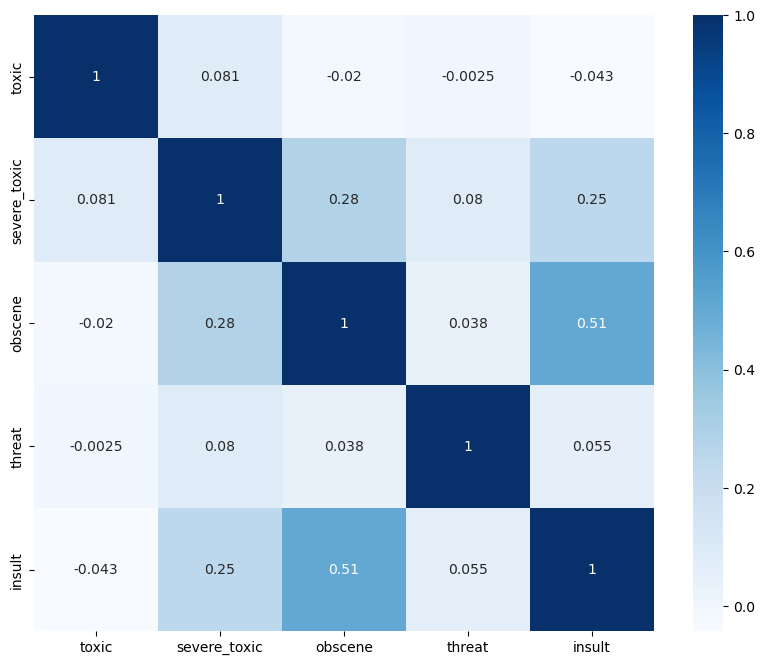

In [94]:
# Matriz de correlación cruzada entre etiquetas
import seaborn as sns
rowsums = final_data.iloc[:, 2:].sum(axis=1)
temp = final_data.iloc[:, 2:-1]
train_corr = temp[rowsums > 0]
corr = train_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap="Blues")

C:\Users\usuario\AppData\Local\Temp\ipykernel_24088\1193290162.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


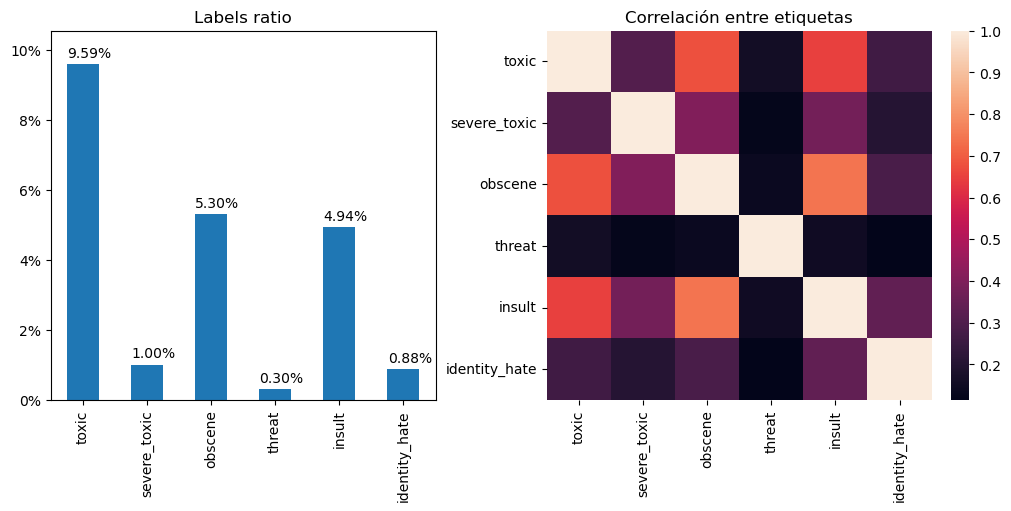

In [95]:
# import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

# Labels distribution barplot
labels_ratio = final_data[columns].mean()
labels_ratio.plot(kind="bar", ax=ax1)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=False))
for p in ax1.patches:
    ax1.set_ylim(0, 1.1 * labels_ratio.max())
    ax1.annotate(f"{p.get_height():.2%}", (p.get_x() + 0.005, p.get_height() + 0.002))
ax1.set_title("Labels ratio");

# Labels correlation heatmap
ax2 = sns.heatmap(final_data[columns].corr())
ax2.set_title("Correlación entre etiquetas")
fig.show()